In [38]:
import qutip as qt
from qutip.qip.circuit import QubitCircuit
import numpy as np
import matplotlib.pyplot as plt

In [84]:
def RXX(phi):
    mat = np.zeros((4, 4), dtype=complex)
    mat[0, 0] = mat[1, 1] = mat[2, 2] = mat[3, 3] = np.cos(phi/2)
    mat[0, 3] = mat[1, 2] = mat[2, 1] = mat[3, 0] = -1j * np.sin(phi/2)
    return qt.Qobj(mat, dims=[[2, 2], [2, 2]])

In [85]:
def output_counterintuitive_XXNNN(phi, phi2, N):
    zero_state = qt.basis(2, 0)
    for _ in range(N-1):
        zero_state = qt.tensor(zero_state, qt.basis(2, 0))
    qc = QubitCircuit(N)
    qc.user_gates = {"RXX": RXX}
    for i in range(N):
        qc.add_gate("SNOT", targets=i)
    for i in range(N-1):
        qc.add_gate("CZ", controls=i, targets=i+1)
    for i in range(2, N-4, 2):
        qc.add_gate("RXX", targets=[i, i+2], arg_value=phi)
    qc.add_gate("RX", targets=[2], arg_value=phi2)
    qc.add_gate("RX", targets=[N-3], arg_value=phi2)
    return qc.run(state=zero_state)

In [41]:
SOP24 = qt.tensor(qt.qeye(2), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.sigmaz(), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2))
SOP26 = qt.tensor(qt.qeye(2), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.qeye(2), qt.sigmax(), qt.sigmaz(), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2))
SOP28 = qt.tensor(qt.qeye(2), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.qeye(2), qt.sigmax(), qt.qeye(2), qt.sigmax(), qt.sigmaz(), qt.qeye(2), qt.qeye(2))
SOP46 = qt.tensor(qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.sigmaz(), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2))
SOP48 =  qt.tensor(qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.qeye(2), qt.sigmax(), qt.sigmaz(), qt.qeye(2), qt.qeye(2))
SOP68 = qt.tensor(qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.sigmaz(), qt.qeye(2), qt.qeye(2))
SOP2468 = qt.tensor(qt.qeye(2), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.sigmaz(), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.sigmaz(), qt.qeye(2), qt.qeye(2))
SOP246 = qt.tensor(qt.qeye(2), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.sigmaz(), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.qeye(2), qt.sigmax(), qt.sigmaz())
SOP248 = qt.tensor(qt.qeye(2), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.sigmaz(), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.sigmaz())
SOP268 = qt.tensor(qt.qeye(2), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.qeye(2), qt.sigmax(), qt.sigmaz(), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.sigmaz())
SOP468 = qt.tensor(qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.sigmaz(), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.sigmaz())
SOP2end = qt.tensor(qt.qeye(2), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.qeye(2), qt.sigmax(), qt.qeye(2), qt.sigmax(), qt.qeye(2), qt.sigmax(), qt.sigmaz())
SOP4end = qt.tensor(qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.qeye(2), qt.sigmax(), qt.qeye(2), qt.sigmax(), qt.sigmaz())
SOP6end = qt.tensor(qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.qeye(2), qt.sigmax(), qt.sigmaz())
SOP8end = qt.tensor(qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.sigmaz(), qt.sigmax(), qt.sigmaz())
I = qt.tensor(qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2))

In [42]:
def logicalX_tworot(betak, betal, SOPkl):
    return np.cos(betak)*np.cos(betal) - SOPkl*np.sin(betak)*np.sin(betal)

def logicalY_tworot(betak, betal, SOPkend, SOPlend):
    return SOPkend*np.sin(betak)*np.cos(betal) + SOPlend*np.cos(betak)*np.sin(betal)

def logicalX_threerot(betak, betal, betam, SOPkl, SOPkm, SOPlm):
    return -SOPkl * np.sin(betak) * np.sin(betal)*np.cos(betam) - SOPkm * np.sin(betak) * np.cos(betal) * np.sin(betam) - SOPlm * np.cos(betak) * np.sin(betal) * np.sin(betam) + np.cos(betak) * np.cos(betal) * np.cos(betam)

def logicalY_threerot(betak, betal, betam, SOPklm, SOPkend, SOPlend, SOPmend):
    return -SOPklm * np.sin(betak) * np.sin(betal) * np.sin(betam) + SOPkend * np.sin(betak) * np.cos(betal) * np.cos(betam) + SOPlend * np.cos(betak) * np.sin(betal) * np.cos(betam) + SOPmend * np.cos(betak) * np.cos(betal) * np.sin(betam)

def logicalX_fourrot(betak, betal, betam, betan, SOPkl, SOPkm, SOPkn, SOPlm, SOPln, SOPmn, SOPklmn):
    return SOPklmn * np.sin(betak)*np.sin(betal)*np.sin(betam)*np.sin(betan) - SOPkl*np.sin(betak)*np.sin(betal)*np.cos(betam)*np.cos(betan) - SOPkm*np.sin(betak)*np.cos(betal)*np.sin(betam)*np.cos(betan) - SOPkn*np.sin(betak)*np.cos(betal)*np.cos(betam)*np.sin(betan) - SOPlm*np.cos(betak)*np.sin(betal)*np.sin(betam)*np.cos(betan)-SOPln*np.cos(betak)*np.sin(betal)*np.cos(betam)*np.sin(betan)-SOPmn*np.sin(betak)*np.sin(betal)*np.cos(betam)*np.cos(betan) + np.cos(betak)*np.cos(betal)*np.cos(betam)*np.cos(betan)

def logicalY_fourrot(betak, betal, betam, betan, SOPk, SOPl, SOPm, SOPn, SOPklm, SOPkln, SOPkmn, SOPlmn):
    return -SOPklm*np.sin(betak)*np.sin(betal)*np.sin(betam)*np.cos(betan) - SOPkln*np.sin(betak)*np.sin(betal)*np.cos(betam)*np.sin(betan) - SOPkmn*np.sin(betak)*np.cos(betal)*np.sin(betam)*np.sin(betan) + SOPk*np.sin(betak)*np.cos(betal)*np.cos(betam)*np.cos(betan) - SOPlmn*np.cos(betak)*np.sin(betal)*np.sin(betam)*np.sin(betan) + SOPl*np.cos(betak)*np.sin(betal)*np.cos(betam)*np.cos(betan) + SOPm*np.cos(betak)*np.cos(betal)*np.sin(betam)*np.cos(betan) + SOPn*np.cos(betak)*np.cos(betal)*np.cos(betam)*np.sin(betan)


def purity_tworot(betak, betal, SOPkl, SOPkend, SOPlend):
    return 1 - logicalX_tworot(betak, betal, SOPkl)**2 - logicalY_tworot(betak, betal, SOPkend, SOPlend)**2

def purity_threerot(betak, betal, betam, SOPkend, SOPlend, SOPmend, SOPkl, SOPkm, SOPlm, SOPklm):
    return 1 - logicalX_threerot(betak, betal, betam, SOPkl, SOPkm, SOPlm)**2 - logicalY_threerot(betak, betal, betam, SOPklm, SOPkend, SOPlend, SOPmend)**2

def purity_fourrot(betak, betal, betam, betan, SOPk, SOPl, SOPm, SOPn, SOPkl, SOPkm, SOPkn, SOPlm, SOPln, SOPmn, SOPklm, SOPkln, SOPkmn, SOPlmn, SOPklmn):
    return 1 - logicalX_fourrot(betak, betal, betam, betan, SOPkl, SOPkm, SOPkn, SOPlm, SOPln, SOPmn, SOPklmn)**2 - logicalY_fourrot(betak, betal, betam, betan, SOPk, SOPl, SOPm, SOPn, SOPklm, SOPkln, SOPkmn, SOPlmn)**2

def f(Kkl, Kkend):
    if Kkl == 1 and Kkend == 1:
        return 0.5
    else:
        return (Kkl - Kkend**2)/(1 - Kkend**2)

In [77]:
phi_ar = np.linspace(0, np.pi/2, 2000)
beta = np.pi/2

In [78]:
tworot_close_purity_ar = []
tworot_far_purity_ar = []
threerot_purity_ar = []
threerot_far_purity_ar = []
fourrot_purity_ar = []
f_ar = []
for phi in phi_ar:
    state = output_counterintuitive_XXNNN(phi, phi, 11)
    SOP24_val = qt.expect(SOP24, state)
    SOP26_val = qt.expect(SOP26, state)
    SOP28_val = qt.expect(SOP28, state)
    SOP46_val = qt.expect(SOP46, state)
    SOP48_val = qt.expect(SOP48, state)
    SOP68_val = qt.expect(SOP68, state)
    SOP246_val = qt.expect(SOP246, state)
    SOP248_val = qt.expect(SOP248, state)
    SOP268_val = qt.expect(SOP268, state)
    SOP468_val = qt.expect(SOP468, state)
    SOP2468_val = qt.expect(SOP2468, state)
    SOP2end_val = qt.expect(SOP2end, state)
    SOP4end_val = qt.expect(SOP4end, state)
    SOP6end_val = qt.expect(SOP6end, state)
    SOP8end_val = qt.expect(SOP8end, state)
    tworot_close_purity_ar.append(purity_tworot(beta/2, beta/2, SOP24_val, SOP2end_val, SOP4end_val))
    tworot_far_purity_ar.append(purity_tworot(beta/2, beta/2, SOP28_val, SOP2end_val, SOP8end_val))
    threerot_purity_ar.append(purity_threerot(beta/3, beta/3, beta/3, SOP2end_val, SOP4end_val, SOP6end_val, SOP24_val, SOP26_val, SOP46_val, SOP246_val))
    threerot_far_purity_ar.append(purity_threerot(beta/3, beta/3, beta/3, SOP2end_val, SOP4end_val, SOP8end_val, SOP24_val, SOP28_val, SOP48_val, SOP248_val))
    fourrot_purity_ar.append(purity_fourrot(beta/4, beta/4, beta/4, beta/4, SOP2end_val, SOP4end_val, SOP6end_val, SOP8end_val, SOP24_val, SOP26_val, SOP28_val, SOP46_val, SOP48_val, SOP68_val, SOP246_val, SOP248_val, SOP268_val, SOP468_val, SOP2468_val))

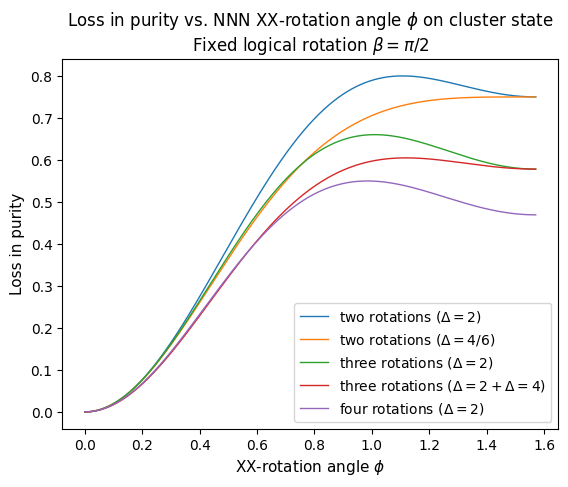

In [64]:
plt.plot(phi_ar, tworot_close_purity_ar, "-", label=r"two rotations ($\Delta=2$)", linewidth=1)
plt.plot(phi_ar, tworot_far_purity_ar,  "-", label=r"two rotations ($\Delta=4/6$)", linewidth=1)
plt.plot(phi_ar, threerot_purity_ar, "-", label=r"three rotations ($\Delta=2$)", linewidth=1)
plt.plot(phi_ar, threerot_far_purity_ar, "-", label=r"three rotations ($\Delta=2 + \Delta= 4$)", linewidth=1)
plt.plot(phi_ar, fourrot_purity_ar, "-", label=r"four rotations ($\Delta=2$)", linewidth=1)
plt.ylabel("Loss in purity", size=11)
plt.xlabel(r"XX-rotation angle $\phi$", size=11)
plt.legend(loc="best", fontsize=10)
plt.title(r"Loss in purity vs. NNN XX-rotation angle $\phi$ on cluster state" + "\n" + r"Fixed logical rotation $\beta=\pi/2$")
plt.savefig("figures/CI_counterexample.pdf")

In [80]:
# Finding crossover points

difference = np.array(tworot_far_purity_ar)-np.array(threerot_purity_ar)
max = 0
for i in range(len(difference)):
    if difference[i] < 0:
        max = i
print(max)
print(phi_ar[max])

difference = np.array(threerot_far_purity_ar) - np.array(fourrot_purity_ar)
max = 0
for i in range(len(difference)):
    if difference[i] < 0:
        max = i
print(max)
print(phi_ar[max])

964
0.7575025808055429
731
0.5744132640755725


In [90]:
phi = np.pi/4
beta_ar = np.linspace(0, np.pi/2, 1000)

In [91]:
tworot_close_purity_ar = []
tworot_far_purity_ar = []
threerot_purity_ar = []
threerot_far_purity_ar = []
fourrot_purity_ar = []
for beta in beta_ar:
    state = output_counterintuitive_XXNNN(phi, phi, 11)
    SOP24_val = qt.expect(SOP24, state)
    SOP26_val = qt.expect(SOP26, state)
    SOP28_val = qt.expect(SOP28, state)
    SOP46_val = qt.expect(SOP46, state)
    SOP48_val = qt.expect(SOP48, state)
    SOP68_val = qt.expect(SOP68, state)
    SOP246_val = qt.expect(SOP246, state)
    SOP248_val = qt.expect(SOP248, state)
    SOP268_val = qt.expect(SOP268, state)
    SOP468_val = qt.expect(SOP468, state)
    SOP2468_val = qt.expect(SOP2468, state)
    SOP2end_val = qt.expect(SOP2end, state)
    SOP4end_val = qt.expect(SOP4end, state)
    SOP6end_val = qt.expect(SOP6end, state)
    SOP8end_val = qt.expect(SOP8end, state)
    tworot_close_purity_ar.append(purity_tworot(beta/2, beta/2, SOP24_val, SOP2end_val, SOP4end_val))
    tworot_far_purity_ar.append(purity_tworot(beta/2, beta/2, SOP28_val, SOP2end_val, SOP8end_val))
    threerot_purity_ar.append(purity_threerot(beta/3, beta/3, beta/3, SOP2end_val, SOP4end_val, SOP6end_val, SOP24_val, SOP26_val, SOP46_val, SOP246_val))
    threerot_far_purity_ar.append(purity_threerot(beta/3, beta/3, beta/3, SOP2end_val, SOP4end_val, SOP8end_val, SOP24_val, SOP28_val, SOP48_val, SOP248_val))
    fourrot_purity_ar.append(purity_fourrot(beta/4, beta/4, beta/4, beta/4, SOP2end_val, SOP4end_val, SOP6end_val, SOP8end_val, SOP24_val, SOP26_val, SOP28_val, SOP46_val, SOP48_val, SOP68_val, SOP246_val, SOP248_val, SOP268_val, SOP468_val, SOP2468_val))

Text(0.5, 1.0, 'Theory loss in purity vs. Logical rotation angle $\\beta$\ncluster state with $\\phi = \\frac{\\pi}{4}$ NNN-$XX$ rotation')

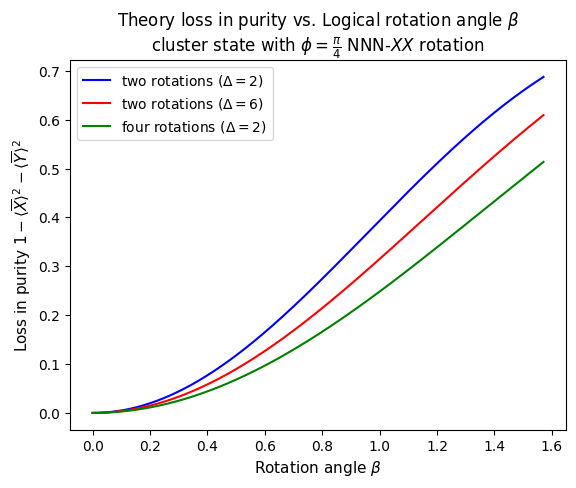

In [92]:
plt.plot(beta_ar, tworot_close_purity_ar, "b-", label=r"two rotations ($\Delta=2$)")
plt.plot(beta_ar, tworot_far_purity_ar, "r-", label=r"two rotations ($\Delta=6$)")
plt.plot(beta_ar, fourrot_purity_ar, "g-", label=r"four rotations ($\Delta=2$)")
plt.ylabel(r"Loss in purity $1 - \langle \overline{X}\rangle^2 - \langle \overline{Y}\rangle^2$", size=11)
plt.xlabel(r"Rotation angle $\beta$", size=11)
plt.legend(loc="best", fontsize=10)
plt.title(r"Theory loss in purity vs. Logical rotation angle $\beta$" + "\n" +  r"cluster state with $\phi = \frac{\pi}{4}$ NNN-$XX$ rotation", size=12)
plt.savefig("figures/CI_purity_theory.pdf")

# Symbolically finding analytic expressions

In [65]:
import sympy as sp

In [66]:
K2, K4, K6, K8, gamma2, gamma4, gamma6, gamma8, beta = sp.symbols("K2, K4, K6, K8, gamma2, gamma4, gamma6, gamma8, beta")

In [67]:
M2 = sp.Matrix([[sp.cos(gamma2), -sp.sin(gamma2)*K2], [sp.sin(gamma2)*K2, sp.cos(gamma2)]])
M4 = sp.Matrix([[sp.cos(gamma4), -sp.sin(gamma4)*K4], [sp.sin(gamma4)*K4, sp.cos(gamma4)]])
M6 = sp.Matrix([[sp.cos(gamma6), -sp.sin(gamma6)*K6], [sp.sin(gamma6)*K6, sp.cos(gamma6)]])
M8 = sp.Matrix([[sp.cos(gamma8), -sp.sin(gamma8)*K8], [sp.sin(gamma8)*K8, sp.cos(gamma8)]])
start = sp.Matrix([1, 0])

In [69]:
M2 * start

Matrix([
[   cos(gamma2)],
[K2*sin(gamma2)]])

In [70]:
M4 * M2 * start

Matrix([
[-K2*K4*sin(gamma2)*sin(gamma4) + cos(gamma2)*cos(gamma4)],
[ K2*sin(gamma2)*cos(gamma4) + K4*sin(gamma4)*cos(gamma2)]])

In [71]:
M6 * M4 * M2 * start

Matrix([
[K2*(-K4*sin(gamma4)*cos(gamma6) - K6*sin(gamma6)*cos(gamma4))*sin(gamma2) + (-K4*K6*sin(gamma4)*sin(gamma6) + cos(gamma4)*cos(gamma6))*cos(gamma2)],
[ K2*(-K4*K6*sin(gamma4)*sin(gamma6) + cos(gamma4)*cos(gamma6))*sin(gamma2) + (K4*sin(gamma4)*cos(gamma6) + K6*sin(gamma6)*cos(gamma4))*cos(gamma2)]])

In [72]:
M8 * M6 * M4 * M2 * start

Matrix([
[K2*(-K4*(-K6*K8*sin(gamma6)*sin(gamma8) + cos(gamma6)*cos(gamma8))*sin(gamma4) + (-K6*sin(gamma6)*cos(gamma8) - K8*sin(gamma8)*cos(gamma6))*cos(gamma4))*sin(gamma2) + (K4*(-K6*sin(gamma6)*cos(gamma8) - K8*sin(gamma8)*cos(gamma6))*sin(gamma4) + (-K6*K8*sin(gamma6)*sin(gamma8) + cos(gamma6)*cos(gamma8))*cos(gamma4))*cos(gamma2)],
[  K2*(-K4*(K6*sin(gamma6)*cos(gamma8) + K8*sin(gamma8)*cos(gamma6))*sin(gamma4) + (-K6*K8*sin(gamma6)*sin(gamma8) + cos(gamma6)*cos(gamma8))*cos(gamma4))*sin(gamma2) + (K4*(-K6*K8*sin(gamma6)*sin(gamma8) + cos(gamma6)*cos(gamma8))*sin(gamma4) + (K6*sin(gamma6)*cos(gamma8) + K8*sin(gamma8)*cos(gamma6))*cos(gamma4))*cos(gamma2)]])